## 훈련데이터 & 테스트 데이터를 어떻게 준비하는가?

데이터 다루기:
- 첫번째 머신러닝에서 도미와 빙어의 데이터와 타깃을 주고 훈련한 다음, 같은 데이터로 테스트
  한다면 모두 맞히는 것은 당연하다.
- 연습문제와 시험문제가 달라야 올바르게 학생의 능력을 평가할 수 있듯이 머신러닝의 성능을
  제대로 평가하려면 훈련 데이터와 평가에 사용할 데이터가 각각 달라야 한다.
  
지난 실습에서 사용한 49개의 데이터(35도미, 14빙어)를 적절하게 나누어서 (데이터 편향이 발생하지 않게!)
다시 훈련+ 테스트를 진행해볼 필요가있다.

### Numpy 활용

numpy란? => 파이썬의 대표적인 배열(array) 라이브러리이다.
- numpy는 고차원 배열을 손쉽게 만들고 조작할 수 있는 간편한 도구를 제공한다.
    - 1차원 배열은 선이고, 
    - 2차원 배열은 면, 
    - 3차원 배열은 공간을 나타낸다.
    

- 보통의 xy 좌표계와는 달리 시작점이 왼쪽 위에서 부터 시작한다.
- 생선 데이터를 2차원 넘파이 배열로 변환한다. array() 사용

In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]
 
fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1]*35 + [0]*14

In [2]:
import numpy as np

input_arr = np.array(fish_data)
target_arr = np.array(fish_target)
print(input_arr)
print(input_arr.shape) #49행, 2열의 2차원 array가 만들어졌음을 확인
print(target_arr)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]
(49, 2)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


### 훈련데이터 세트 만들기 

input_arr와 target_arr에서 랜덤하게 샘플을 선택하여 훈련세트와 테스트 세트를 만든다.

단! 주의할 점은 input_arr와 target_arr에서 같은 위치는 함께 선택 되어야 한다.

타깃이 샘플과 함께 이동하지 않으면 올바르게 훈련될 수 없다. (e.g., 예상문제집의 문제를 랜덤하게 선택할때, 문제와 정답을 같이 선택해야한다.)


훈련세트와 테스트세트로 나눌 인덱스값을 잘 기억해야 한다.
넘파이 arrange()사용하여 0~48까지 1씩 증가하는 인덱스를 만든다. 그 다음 인덱스를 램덤하게 섞는다.

In [10]:
np.random.seed(42)  #일정하게 결과를 얻기위해 seed를 지정(pseudo-random generation을 위해)
index = np.arange(49) #0~48 범위에서 1씩 증가하는 index생성
index

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48])

### 주의할점: 
seed(42)로 지정한 랜덤shuffle결과를 받아오려면 다시 np.random.seed(42)를 호출한 후, index를 출력해야한다.

In [11]:
np.random.shuffle(index) #섞는다
print(index) #np.random.seed(42)를 호출해야 같은 shuffle결과가 나옴

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


35개만 훈련데이터로 가져온다

In [12]:
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

#랜덤하게 섞인 인덱스의 첫번째는 13이다. 데이터 조회
print(input_arr[13], train_input[0])

[ 32. 340.] [ 32. 340.]


### 테스트 데이터 세트 만들기

인덱스의 나머지 14개를 테스트 세트로 만든다.

In [13]:
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

- 훈련세트와 테스트 세트에 도미과 빙어가 잘 섞여 있는지 산점도로 
  확인한다. 
- 파란색이 훈련세트이고, 주황색이 테스트 세트이다.

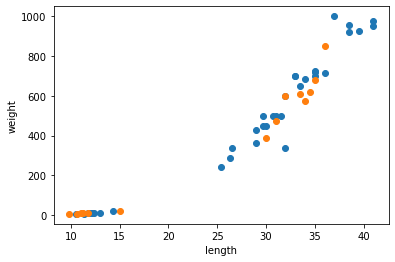

In [14]:
import matplotlib.pyplot as plt
 
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(test_input[:, 0], test_input[:, 1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

train(파란색)과 test(주황색)데이터가 전체 데이터 범위내에 골고루 퍼져있다는 것을 확인한다.

In [16]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

훈련세트와 테스트 세트로 k-최근접 이웃 모델을 훈련시킨다.
- fit()로 새롭게 훈련을 한다.
- score()로 테스트 한다.

In [17]:
kn = kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

- predict() 메서드로 예측 결과와 실제 타깃을 확인해 본다
- predict()결과와 test_target 결과값은 array()로 감싸서 출력된다. 이값은 넘파이 배열이다. 
- 사이킷런 모델의 입력과 출력은 모두 넘파이 배열을 사용한다.

In [19]:
kn.predict(test_input)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [20]:
test_target # test값을 predict()에 입력을때 얻은 결과와 target이 동일하다는것을 확인!

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

## 데이터 준비를 위해 numpy의 메소드 활용

**seed()**
- 랜덤 함수의 결과를 동일하게 재현하고 싶을 때 사용한다.
- random number를 생성할 때  정수로 초기값을 지정한다. 동일한 정수 초기값을 입력해서 동일한 random number를
   뽑을 수 있다.


**arrange()**
 - 일정한 간격의 정수 또는 실수 배열을 만든다. 기본 간격은 1이다.
 - 매개변수가 하나이면:
     - 매개변수는 종료숫자를 의미함.
     - 배열안에 종류숫자는 포함되지 않는다.
     - 0에서 종료 숫자까지 배열을 만든다.
 
 
**shuffle()**
- 주어진 배열을 random하게 섞는다. 다차원 배열일 경우, 각 차원내의 원소 순서를 변함이 없으나, 차원들간의 순서가 shuffle된다. 
- 즉, the order of the values in individual rows does not change; however, the positions of the rows in the array have been shuffled.

참고 link: https://likegeeks.com/numpy-shuffle/

In [22]:
print(np.arange(3))

[0 1 2]


In [23]:
#매개변수가 2개이면 시작숫자, 종료 숫자를 의미한다.
print(np.arange(1,3))

[1 2]


In [24]:
#매개변수가 3개명 마지막 매개변수가 간격을 나타낸다.
print(np.arange(1,3,0.2))

[1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8]


In [35]:
#다차원인 경우, the order of the values in individual rows does not change;
# however, the positions of the rows in the array have been shuffled.
arr = np.array([[1,2,11],[3,4,12],[5,6,13],[7,8,14]])
np.random.shuffle(arr)
print(arr)

[[ 1  2 11]
 [ 7  8 14]
 [ 3  4 12]
 [ 5  6 13]]
